In [1]:
import pandas as pd #used for data manupulation
stock_file_path='HistoricalData_1726775792722.csv' #loading the file path
data_load=pd.read_csv(stock_file_path) #loading the data
print(data_load.head(10)) # printing head 10 rows


        Date     Close    Volume      Open      High       Low
0  9/19/2024  $228.88   50562431  $225.14   $229.82   $224.64 
1  9/18/2024  $220.69   59894930  $217.55   $222.71   $217.54 
2  9/17/2024  $216.79   45519340  $215.75   $216.90   $214.50 
3  9/16/2024  $216.32   59357430  $216.54   $217.22   $213.92 
4  9/13/2024  $222.50   36766620  $223.58   $224.04   $221.91 
5  9/12/2024  $222.77   37498230  $222.50   $223.55   $219.82 
6  9/11/2024  $222.66   44587070  $221.46   $223.09   $217.89 
7  9/10/2024  $220.11   51591030  $218.92   $221.48   $216.73 
8   9/9/2024  $220.91   67179970  $220.82   $221.27   $216.71 
9   9/6/2024  $220.82   48423010  $223.95   $225.24   $219.77 


In [2]:
#Lets start preprocessing
#converting date column in date time format
data_load['Date']=pd.to_datetime(data_load['Date'])
print(data_load.head(10))


        Date     Close    Volume      Open      High       Low
0 2024-09-19  $228.88   50562431  $225.14   $229.82   $224.64 
1 2024-09-18  $220.69   59894930  $217.55   $222.71   $217.54 
2 2024-09-17  $216.79   45519340  $215.75   $216.90   $214.50 
3 2024-09-16  $216.32   59357430  $216.54   $217.22   $213.92 
4 2024-09-13  $222.50   36766620  $223.58   $224.04   $221.91 
5 2024-09-12  $222.77   37498230  $222.50   $223.55   $219.82 
6 2024-09-11  $222.66   44587070  $221.46   $223.09   $217.89 
7 2024-09-10  $220.11   51591030  $218.92   $221.48   $216.73 
8 2024-09-09  $220.91   67179970  $220.82   $221.27   $216.71 
9 2024-09-06  $220.82   48423010  $223.95   $225.24   $219.77 


In [3]:
# lets deal with missing values 
missing_values=data_load.isnull().sum()
print(missing_values)

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [4]:
# Remove dollar signs and any trailing or leading spaces
data_load['Close'] = data_load['Close'].replace({'\$': '', ',': ''}, regex=True).str.strip()

# Convert the 'Close' column to numeric (float)
data_load['Close'] = pd.to_numeric(data_load['Close'], errors='coerce')

# Now you can calculate the moving averages
data_load['5_day_movingAverage'] = data_load['Close'].rolling(window=5).mean()
data_load['20_day_movingAverage'] = data_load['Close'].rolling(window=20).mean()

# Print the results
print(data_load[['Date', 'Close', '5_day_movingAverage', '20_day_movingAverage']].head(25))


         Date   Close  5_day_movingAverage  20_day_movingAverage
0  2024-09-19  228.88                  NaN                   NaN
1  2024-09-18  220.69                  NaN                   NaN
2  2024-09-17  216.79                  NaN                   NaN
3  2024-09-16  216.32                  NaN                   NaN
4  2024-09-13  222.50              221.036                   NaN
5  2024-09-12  222.77              219.814                   NaN
6  2024-09-11  222.66              220.208                   NaN
7  2024-09-10  220.11              220.872                   NaN
8  2024-09-09  220.91              221.790                   NaN
9  2024-09-06  220.82              221.454                   NaN
10 2024-09-05  222.38              221.376                   NaN
11 2024-09-04  220.85              221.014                   NaN
12 2024-09-03  222.77              221.546                   NaN
13 2024-08-30  229.00              223.164                   NaN
14 2024-08-29  229.79    

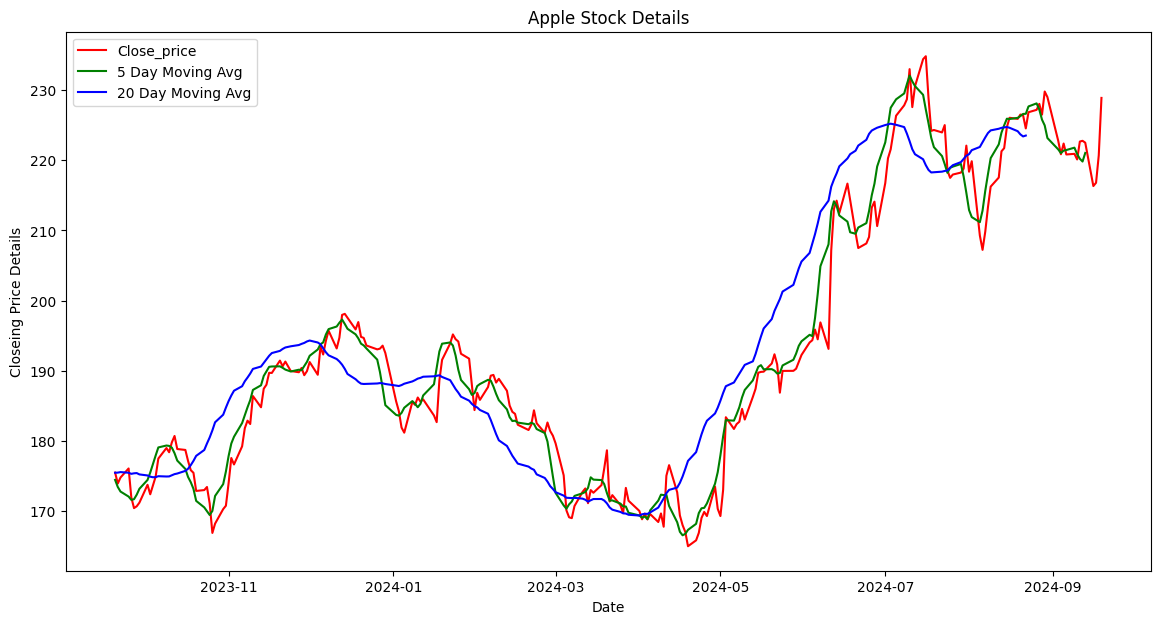

In [5]:
#plotting line graph/chart

import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))

plt.plot(data_load['Date'],data_load['Close'],label='Close_price',color='red') # plotting close price

plt.plot(data_load['Date'],data_load['5_day_movingAverage'],label='5 Day Moving Avg',color='Green') # plotting 5_day_movingAverage

plt.plot(data_load['Date'],data_load['20_day_movingAverage'],label='20 Day Moving Avg',color='blue') # plotting 20_day_movingAverage

plt.title('Apple Stock Details')
plt.xlabel('Date')
plt.ylabel('Closeing Price Details')

plt.legend()

plt.show()


In [6]:
# Let get the daily returns
data_load['daily_returns']=data_load['Close'].pct_change()
print(data_load[['Date','Close','daily_returns']].head(10))

        Date   Close  daily_returns
0 2024-09-19  228.88            NaN
1 2024-09-18  220.69      -0.035783
2 2024-09-17  216.79      -0.017672
3 2024-09-16  216.32      -0.002168
4 2024-09-13  222.50       0.028569
5 2024-09-12  222.77       0.001213
6 2024-09-11  222.66      -0.000494
7 2024-09-10  220.11      -0.011452
8 2024-09-09  220.91       0.003635
9 2024-09-06  220.82      -0.000407


In [7]:
## Calculate 20-day rolling volatility (standard deviation)

data_load['Volitility/STD']=data_load['daily_returns'].rolling(window=20).std()
print(data_load[['Date','daily_returns','Volitility/STD']].head(30))

         Date  daily_returns  Volitility/STD
0  2024-09-19            NaN             NaN
1  2024-09-18      -0.035783             NaN
2  2024-09-17      -0.017672             NaN
3  2024-09-16      -0.002168             NaN
4  2024-09-13       0.028569             NaN
5  2024-09-12       0.001213             NaN
6  2024-09-11      -0.000494             NaN
7  2024-09-10      -0.011452             NaN
8  2024-09-09       0.003635             NaN
9  2024-09-06      -0.000407             NaN
10 2024-09-05       0.007065             NaN
11 2024-09-04      -0.006880             NaN
12 2024-09-03       0.008694             NaN
13 2024-08-30       0.027966             NaN
14 2024-08-29       0.003450             NaN
15 2024-08-28      -0.014361             NaN
16 2024-08-27       0.006799             NaN
17 2024-08-26      -0.003728             NaN
18 2024-08-23      -0.001497             NaN
19 2024-08-22      -0.010183             NaN
20 2024-08-21       0.008329        0.014445
21 2024-08

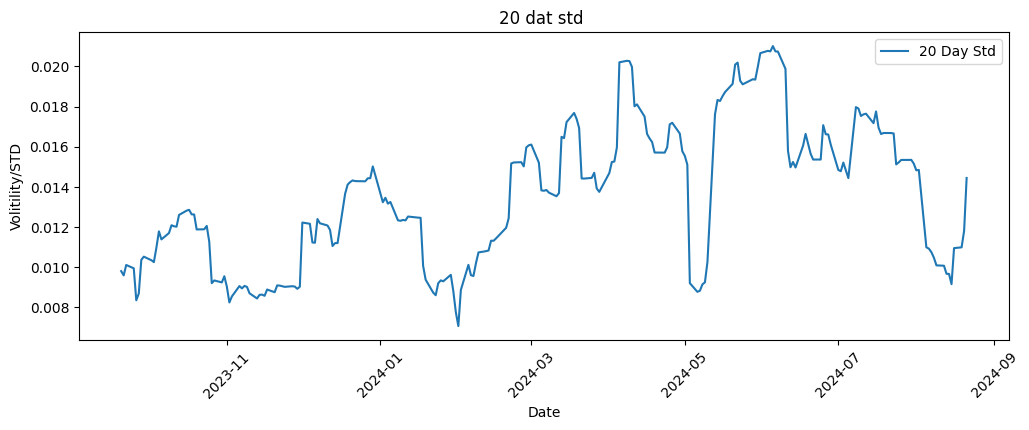

In [8]:
plt.figure(figsize=(12,4))
plt.plot(data_load['Date'],data_load['Volitility/STD'],label='20 Day Std')
plt.xlabel('Date')
plt.ylabel('Volitility/STD')
plt.title('20 dat std ')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [9]:
# Calculate daily returns if not already done
data_load['Daily_Return'] = data_load['Close'].pct_change()

# Calculate the Interquartile Range (IQR) for daily returns
Q1 = data_load['Daily_Return'].quantile(0.25)
Q3 = data_load['Daily_Return'].quantile(0.75)
IQR = Q3 - Q1

#IQR means Measures the spread of the middle 50% of data. 

# Define outliers as those points outside 1.5*IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Here the range is 1.5, that means the data which is more then the 1.5 is considered as the outliers 

# Flag outliers
outliers = data_load[(data_load['Daily_Return'] < lower_bound) | (data_load['Daily_Return'] > upper_bound)]
print("thses are the outlires")
print(outliers)


#The 1.5 IQR rule is a standard method in statistics to detect outliers. It is based on the Interquartile Range (IQR), which measures the spread of the middle 50% of the data.

#Why 1.5?
#IQR (Interquartile Range): This is the range between the 1st quartile (Q1, the 25th percentile) and the 3rd quartile (Q3, the 75th percentile). It measures the spread of the central 50% of the data.
#Outliers are typically defined as data points that fall significantly far from this central range.

#It works well for most data distributions without being overly aggressive in detecting outliers.
#It's a good starting point for identifying unusual data points in the absence of specific domain knowledge.

thses are the outlires
          Date   Close     Volume      Open      High       Low  \
1   2024-09-18  220.69   59894930  $217.55   $222.71   $217.54    
33  2024-08-02  219.86  105568600  $219.15   $225.60   $217.71    
70  2024-06-10  193.12   97262080  $196.90   $197.30   $192.15    
96  2024-05-02  173.03   94214920  $172.51   $173.42   $170.89    
112 2024-04-10  167.78   49709340  $168.80   $169.09   $167.11    
126 2024-03-20  178.67   53423100  $175.72   $178.67   $175.09    
170 2024-01-17  182.68   47317430  $181.27   $182.93   $180.30    
181 2023-12-29  192.53   42672150  $193.90   $194.40   $191.73    

     5_day_movingAverage  20_day_movingAverage  daily_returns  Volitility/STD  \
1                    NaN                   NaN      -0.035783             NaN   
33               211.898              221.4340       0.050604        0.014844   
70               208.014              214.2395      -0.067729        0.019881   
96               180.652              186.8370   

In [10]:
# Ensure the data is sorted by date
data_load = data_load.sort_values('Date')

print(data_load)

          Date   Close    Volume      Open      High       Low  \
251 2023-09-20  175.49  58436180  $179.26   $179.70   $175.40    
250 2023-09-21  173.93  63149120  $174.55   $176.30   $173.86    
249 2023-09-22  174.79  56725390  $174.67   $177.08   $174.05    
248 2023-09-25  176.08  46172740  $174.20   $176.97   $174.15    
247 2023-09-26  171.96  64588950  $174.82   $175.20   $171.66    
..         ...     ...       ...       ...       ...       ...   
4   2024-09-13  222.50  36766620  $223.58   $224.04   $221.91    
3   2024-09-16  216.32  59357430  $216.54   $217.22   $213.92    
2   2024-09-17  216.79  45519340  $215.75   $216.90   $214.50    
1   2024-09-18  220.69  59894930  $217.55   $222.71   $217.54    
0   2024-09-19  228.88  50562431  $225.14   $229.82   $224.64    

     5_day_movingAverage  20_day_movingAverage  daily_returns  Volitility/STD  \
251              174.450              175.4700       0.008969        0.009802   
250              173.438              175.487

In [11]:
# Define the percentage for splitting
train_size = 0.7  # 70% training
validation_size = 0.15  # 15% validation
test_size = 0.15  # 15% testing

# Get the split indices
train_idx = int(len(data_load) * train_size)
val_idx = int(len(data_load) * (train_size + validation_size))

# Split the data
train_data = data_load[:train_idx]
validation_data = data_load[train_idx:val_idx]
test_data = data_load[val_idx:]

# Display the sizes of the splits
print(f"Train data: {len(train_data)}, Validation data: {len(validation_data)}, Test data: {len(test_data)}")

Train data: 176, Validation data: 38, Test data: 38


In [12]:
# Select features for the model
features = ['Close', '5_day_movingAverage', '20_day_movingAverage']
# Training features and target (we'll predict the 'Close' price for the next day)
X_train = train_data[features]
y_train = train_data['Close'].shift(-1)  # Shifting to predict next day's close price

# Validation and Test sets
X_validation = validation_data[features]
y_validation = validation_data['Close'].shift(-1)


X_test = test_data[features]
y_test = test_data['Close'].shift(-1)

# Drop the last row with NaN due to shifting
X_train = X_train[:-1]
y_train = y_train[:-1]

X_validation = X_validation[:-1]
y_validation = y_validation[:-1]

X_test = X_test[:-1]
y_test = y_test[:-1]

# Display the first few rows to confirm
print(X_train.head(), y_train.head())

      Close  5_day_movingAverage  20_day_movingAverage
251  175.49              174.450              175.4700
250  173.93              173.438              175.4875
249  174.79              172.790              175.5640
248  176.08              172.074              175.4685
247  171.96              171.608              175.3145 251    173.93
250    174.79
249    176.08
248    171.96
247    170.43
Name: Close, dtype: float64


In [13]:
# Count the number of missing values (NaNs) in each column
missing_values_train = X_train.isna().sum()
missing_values_validation = X_validation.isna().sum()
missing_values_test = X_test.isna().sum()

# Display the count of missing values
print("Missing values in training set:\n", missing_values_train)
print("Missing values in validation set:\n", missing_values_validation)
print("Missing values in test set:\n", missing_values_test)

Missing values in training set:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Missing values in validation set:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Missing values in test set:
 Close                    0
5_day_movingAverage      3
20_day_movingAverage    18
dtype: int64


In [14]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train after dropping rows

X_validation = X_validation.dropna()
y_validation = y_validation[X_validation.index]  # Align y_validation with X_validation

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align y_test with X_test

# Confirm no missing values remain
print("Training set missing values after dropping:\n", X_train.isna().sum())
print("Validation set missing values after dropping:\n", X_validation.isna().sum())
print("Test set missing values after dropping:\n", X_test.isna().sum())


Training set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Validation set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Test set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on validation data
y_pred_validation = model.predict(X_validation)

# Evaluate the model performance on validation set
mse = mean_squared_error(y_validation, y_pred_validation)
print(f'Validation MSE: {mse}')

Validation MSE: 6.9847708649728295


In [16]:

import numpy as np

# Given MSE
mse = 7.010810618196867

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Validation RMSE: {rmse}')


Validation RMSE: 2.647793537683191


In [17]:
# Calculate the average closing price
average_closing_price = data_load['Close'].mean()

# Print the result
print(f'Average Closing Price: {average_closing_price}')


Average Closing Price: 192.66996031746032


In [18]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict stock prices on the test set
y_pred = model.predict(X_test)

# Display the predicted values
print("Predicted values for the stock prices:\n", y_pred)

# Compare with actual values from the test set
print("Actual values from the test set:\n", y_test.values)


Predicted values for the stock prices:
 [219.10249985 217.94493699 217.30179473 214.26562392 213.98462619
 209.93613882 210.4327708  213.30184982 216.15716414 218.77169306
 220.62005397 223.06972781 223.98165514 225.65288442 226.07016795
 226.16320581 226.58461624 226.78906075 226.1783704 ]
Actual values from the test set:
 [218.8  222.08 218.36 219.86 209.27 207.23 209.82 213.31 216.24 217.53
 221.27 221.72 224.72 226.05 225.89 226.51 226.4  224.53 226.84]


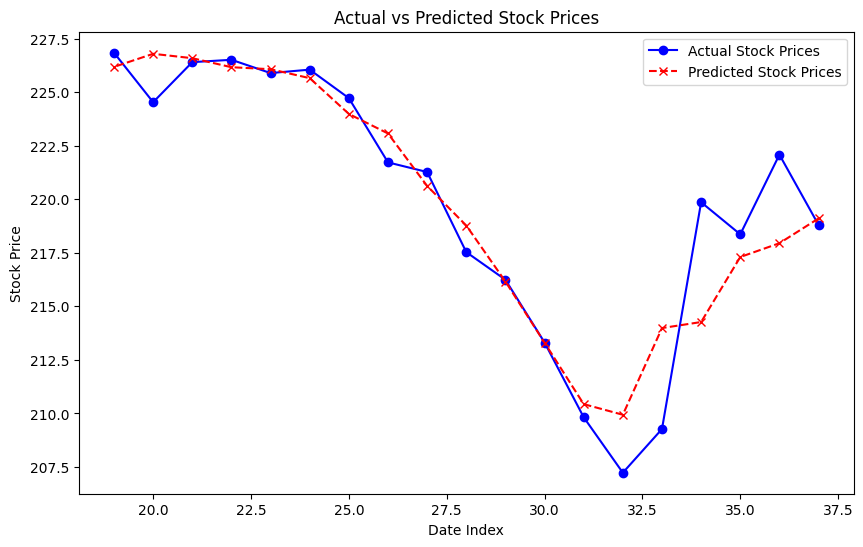

In [19]:
import matplotlib.pyplot as plt

# Create a line graph to compare actual and predicted stock prices
plt.figure(figsize=(10, 6))

# Plot actual stock prices
plt.plot(y_test.index, y_test, label='Actual Stock Prices', color='blue', marker='o')

# Plot predicted stock prices
plt.plot(y_test.index, y_pred, label='Predicted Stock Prices', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [20]:
# Extract the last row of the dataset (9/3/2024)
last_row = data_load.iloc[-1]

# Create a new row for 9/19/2024
# Calculate features like 'Close', moving averages, and other necessary features
new_data = {}

# Keep the Date for the new prediction day
new_data['Date'] = pd.Timestamp('2024-09-20')

# Use the 'Close' price from 9/3/2024 (last row's closing price) for next day's prediction
new_data['Close'] = last_row['Close']

# Calculate 5-day and 20-day moving averages based on the last available data
new_data['5_day_movingAverage'] = data_load['Close'].tail(5).mean()
new_data['20_day_movingAverage'] = data_load['Close'].tail(20).mean()

# If other features were used in training (e.g., volatility, daily returns), include them here as well
# Example: new_data['Volatility'] = ...
# For now, we'll use moving averages and 'Close' price for simplicity

# Convert the new_data dictionary to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Extract the features used in training (ensure consistency with training data)
X_new = new_data_df[['Close', '5_day_movingAverage', '20_day_movingAverage']]

# Predict the stock price for 9/4/2024
predicted_price = model.predict(X_new)

# Display the predicted price
print(f"Predicted Stock Price for 9/20/2024: {predicted_price[0]}")


Predicted Stock Price for 9/20/2024: 223.5245942018007


In [49]:
# Calculate Exponential Moving Averages (EMA)
data_load['5_day_EMA'] = data_load['Close'].ewm(span=5, adjust=False).mean()
data_load['20_day_EMA'] = data_load['Close'].ewm(span=20, adjust=False).mean()

# Display the data with new columns
print(data_load[['Date', 'Close', '5_day_EMA', '20_day_EMA']].head())


          Date   Close   5_day_EMA  20_day_EMA
251 2023-09-20  175.49  175.490000  175.490000
250 2023-09-21  173.93  174.970000  175.341429
249 2023-09-22  174.79  174.910000  175.288912
248 2023-09-25  176.08  175.300000  175.364253
247 2023-09-26  171.96  174.186667  175.040039


In [59]:
def calculate_RSI(data, window=1):
    delta = data_load['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data_load['RSI'] = calculate_RSI(data_load)

# Display the RSI
print(data_load[['Date', 'Close', 'RSI']].head())


          Date   Close    RSI
251 2023-09-20  175.49    NaN
250 2023-09-21  173.93    0.0
249 2023-09-22  174.79  100.0
248 2023-09-25  176.08  100.0
247 2023-09-26  171.96    0.0


In [55]:
# Calculate MACD and Signal Line
data_load['MACD'] = data_load['Close'].ewm(span=12, adjust=False).mean() - data_load['Close'].ewm(span=26, adjust=False).mean()
data_load['MACD_Signal'] = data_load['MACD'].ewm(span=9, adjust=False).mean()

# Display MACD and Signal Line
print(data_load[['Date', 'Close', 'MACD', 'MACD_Signal']].head())


          Date   Close      MACD  MACD_Signal
251 2023-09-20  175.49  0.000000     0.000000
250 2023-09-21  173.93 -0.124444    -0.024889
249 2023-09-22  174.79 -0.151921    -0.050295
248 2023-09-25  176.08 -0.068812    -0.053999
247 2023-09-26  171.96 -0.331574    -0.109514


In [57]:
# Calculate Bollinger Bands
data_load['20_day_SMA'] = data_load['Close'].rolling(window=20).mean()
data_load['Upper_Band'] = data_load['20_day_SMA'] + (data_load['Close'].rolling(window=20).std() * 2)
data_load['Lower_Band'] = data_load['20_day_SMA'] - (data_load['Close'].rolling(window=20).std() * 2)

# Display Bollinger Bands
print(data_load[['Date', 'Close', 'Upper_Band', 'Lower_Band']].head())


          Date   Close  Upper_Band  Lower_Band
251 2023-09-20  175.49         NaN         NaN
250 2023-09-21  173.93         NaN         NaN
249 2023-09-22  174.79         NaN         NaN
248 2023-09-25  176.08         NaN         NaN
247 2023-09-26  171.96         NaN         NaN


In [61]:
# Assuming 'Volume' is already present in the dataset (if not, ensure you have it)
# Display the volume column to check
print(data_load[['Date', 'Close', 'Volume']].head(10))


          Date   Close    Volume
251 2023-09-20  175.49  58436180
250 2023-09-21  173.93  63149120
249 2023-09-22  174.79  56725390
248 2023-09-25  176.08  46172740
247 2023-09-26  171.96  64588950
246 2023-09-27  170.43  66921810
245 2023-09-28  170.69  56294420
244 2023-09-29  171.21  51861080
243 2023-10-02  173.75  52164540
242 2023-10-03  172.40  49594610


In [63]:
# Calculate VWAP (Volume Weighted Average Price)
data_load['VWAP'] = (data_load['Close'] * data_load['Volume']).cumsum() / data_load['Volume'].cumsum()

# Display the VWAP
print(data_load[['Date', 'Close', 'VWAP']].head(10))


          Date   Close        VWAP
251 2023-09-20  175.49  175.490000
250 2023-09-21  173.93  174.679765
249 2023-09-22  174.79  174.714834
248 2023-09-25  176.08  174.995627
247 2023-09-26  171.96  174.317361
246 2023-09-27  170.43  173.586593
245 2023-09-28  170.69  173.191088
244 2023-09-29  171.21  172.969734
243 2023-10-02  173.75  173.048567
242 2023-10-03  172.40  172.991728


In [65]:
# Adding lagged features for 'Close' price and 'Volume'
# Lag 1: Previous day, Lag 5: Previous 5 days

data_load['Lag_1_Close'] = data_load['Close'].shift(1)
data_load['Lag_3_Close'] = data_load['Close'].shift(3)
data_load['Lag_5_Close'] = data_load['Close'].shift(5)

# Similarly, lagging volume
data_load['Lag_1_Volume'] = data_load['Volume'].shift(1)
data_load['Lag_3_Volume'] = data_load['Volume'].shift(3)
data_load['Lag_5_Volume'] = data_load['Volume'].shift(5)

# Display the data to see lagged columns
print(data_load[['Date', 'Close', 'Lag_1_Close', 'Lag_3_Close', 'Lag_5_Close', 'Lag_1_Volume', 'Lag_3_Volume', 'Lag_5_Volume']].head(10))


          Date   Close  Lag_1_Close  Lag_3_Close  Lag_5_Close  Lag_1_Volume  \
251 2023-09-20  175.49          NaN          NaN          NaN           NaN   
250 2023-09-21  173.93       175.49          NaN          NaN    58436180.0   
249 2023-09-22  174.79       173.93          NaN          NaN    63149120.0   
248 2023-09-25  176.08       174.79       175.49          NaN    56725390.0   
247 2023-09-26  171.96       176.08       173.93          NaN    46172740.0   
246 2023-09-27  170.43       171.96       174.79       175.49    64588950.0   
245 2023-09-28  170.69       170.43       176.08       173.93    66921810.0   
244 2023-09-29  171.21       170.69       171.96       174.79    56294420.0   
243 2023-10-02  173.75       171.21       170.43       176.08    51861080.0   
242 2023-10-03  172.40       173.75       170.69       171.96    52164540.0   

     Lag_3_Volume  Lag_5_Volume  
251           NaN           NaN  
250           NaN           NaN  
249           NaN           

In [67]:
# Add day of the week (0=Monday, 6=Sunday)
data_load['Day_of_Week'] = data_load['Date'].dt.dayofweek

# Display the updated dataframe to see the day of the week
print(data_load[['Date', 'Close', 'Day_of_Week']].head(10))


          Date   Close  Day_of_Week
251 2023-09-20  175.49            2
250 2023-09-21  173.93            3
249 2023-09-22  174.79            4
248 2023-09-25  176.08            0
247 2023-09-26  171.96            1
246 2023-09-27  170.43            2
245 2023-09-28  170.69            3
244 2023-09-29  171.21            4
243 2023-10-02  173.75            0
242 2023-10-03  172.40            1


In [69]:
# Add the month as a feature
data_load['Month'] = data_load['Date'].dt.month

# Display the updated dataframe with the 'Month' feature
print(data_load[['Date', 'Close', 'Month']].head(10))


          Date   Close  Month
251 2023-09-20  175.49      9
250 2023-09-21  173.93      9
249 2023-09-22  174.79      9
248 2023-09-25  176.08      9
247 2023-09-26  171.96      9
246 2023-09-27  170.43      9
245 2023-09-28  170.69      9
244 2023-09-29  171.21      9
243 2023-10-02  173.75     10
242 2023-10-03  172.40     10


In [71]:
# Add day of the year as a feature
data_load['Day_of_Year'] = data_load['Date'].dt.dayofyear

# Display the day of the year
print(data_load[['Date', 'Close', 'Day_of_Year']].head(10))


          Date   Close  Day_of_Year
251 2023-09-20  175.49          263
250 2023-09-21  173.93          264
249 2023-09-22  174.79          265
248 2023-09-25  176.08          268
247 2023-09-26  171.96          269
246 2023-09-27  170.43          270
245 2023-09-28  170.69          271
244 2023-09-29  171.21          272
243 2023-10-02  173.75          275
242 2023-10-03  172.40          276


In [75]:
# Drop rows with NaN values due to lagged features
data_cleaned = data_load.dropna()

# Display cleaned data
print(f"Data after cleaning: {data_cleaned.shape}")


Data after cleaning: (213, 29)


In [77]:
# Features to include in the model
features = [
    '5_day_movingAverage', '20_day_movingAverage', 'RSI', 'Upper_Band', 'Lower_Band', 
    'VWAP', 'Lag_1_Close', 'Lag_3_Close', 'Lag_5_Close', 
    'Day_of_Week', 'Month', 'Day_of_Year'
]

# Define the target variable
target = 'Close'

# Prepare X (features) and y (target)
X = data_cleaned[features]
y = data_cleaned[target]

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of X_train and X_test
print(X_train.shape, X_test.shape)


(170, 12) (43, 12)


In [79]:
# Retraining the Linear Regression model with new features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a new Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions for the test set
y_pred = model.predict(X_test)

# Calculate the RMSE to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Validation RMSE with additional features: {rmse}")


Validation RMSE with additional features: 2.1022023388949536


D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
# Create a new data point for 09/20/2024 based on the last available data
new_data = {
    '5_day_movingAverage': data_cleaned['5_day_movingAverage'].iloc[-1],
    '20_day_movingAverage': data_cleaned['20_day_movingAverage'].iloc[-1],
    'RSI': data_cleaned['RSI'].iloc[-1],
    'Upper_Band': data_cleaned['Upper_Band'].iloc[-1],
    'Lower_Band': data_cleaned['Lower_Band'].iloc[-1],
    'VWAP': data_cleaned['VWAP'].iloc[-1],
    'Lag_1_Close': data_cleaned['Close'].iloc[-1],  # Close price of 09/19/2024
    'Lag_3_Close': data_cleaned['Close'].iloc[-3],
    'Lag_5_Close': data_cleaned['Close'].iloc[-5],
    'Day_of_Week': 4,  # 09/20/2024 is a Friday
    'Month': 9,  # September
    'Day_of_Year': 264  # 09/20 is the 264th day of the year
}

# Convert the new data point to a dataframe
import pandas as pd

new_data_df = pd.DataFrame([new_data])

# Predict the stock price for 09/20/2024
predicted_price = model.predict(new_data_df)

print(f"Predicted Closing Price for 09/20/2024: {predicted_price[0]}")


Predicted Closing Price for 09/20/2024: 226.36438253684088
